## 載入插件

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager as fm
from matplotlib import cm
import matplotlib
import openpyxl
from openpyxl.utils import get_column_letter, column_index_from_string
plt.rcParams["figure.dpi"] = 200

## 載入資料集

In [2]:
datao = pd.read_excel('output.xlsx')
dataw = pd.read_excel('Web_Scrapped_websites.xlsx')

In [3]:
wb = openpyxl.load_workbook('Web_Scrapped_websites.xlsx')
sheet = wb.active

## 拋棄的語法

In [4]:
# ds = t.iloc[1][0]

# print(ds)
# web= sheet['B2':'B9541']
# tr=sheet['O2':'O9541']

# for row_cells in web:
#     for cell in row_cells:
#         #print(cell.value)

#         rename=cell.value


In [5]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#l= datao[u'Location'].value_counts().to_frame()
#if l<19
#    print(l)

In [6]:
#LH=datao.groupby(["Location","Hosted_by"]).size()
#print(LH)

#ans=LH.size().reset_index(name='counts')
#print(df)

#df = new_r
#print(df['Host'])

#us_sum = datao[datao['Location']=='United States'][datao['Location'].value_counts()].sum()
#fr_sum = df[df['Location''France']=='France']['Hosted_by'].sum()
#ne_sum = df[df['Location']=='Netherlands']['Hosted_by'].sum()
#ge_sum = df[df['Location']=='Germany']['Hosted_by'].sum()
dataw

,Country_Rank,Website,Trustworthiness,Avg_Daily_Visitors,Child_Safety,Avg_Daily_Pageviews,Privacy,Facebook_likes,Twitter_mentions,Google_pluses,...,Month_Average_Daily_Reach_percentage,Daily_Pageviews_percentage,Month_Average_Daily_Pageviews_percentage,Daily_Pageviews_per_user_percentage,Location,Hosted_by,Subnetworks,Registrant,Registrar,country
0,1,www.google.com.af,Excellent,NaN,Excellent,NaN,Excellent,9,1,37,...,1.0,-5.1,12.5,-4.1,United States,Google Inc.,216.58.203.227,NaN,NaN,Afghanistan
1,2,www.google.com,Excellent,515 007 350,Excellent,4 192 159 833,Excellent,94.2K,11.2K,11.7M,...,-1.1,1.8,-6.3,2.1,United States,Google Inc.,216.58.194.100,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
2,3,www.youtube.com,Excellent,506 457 282,Excellent,2 679 159 025,Excellent,13.5K,16.5K,19.3M,...,1.8,9.7,0.5,3.8,United States,Google Inc.,172.217.2.238,DNS Admin (Google Inc.),MARKMONITOR INC.,Afghanistan
3,4,www.facebook.com,Excellent,270 071 255,Good,1 082 985 733,Excellent,5.87M,64.4K,127K,...,-1.5,-8.2,-2.2,-8.2,Ireland,Facebook,31.13.73.36,"Domain Administrator (Facebook, Inc.)",MARKMONITOR INC.,Afghanistan
4,5,www.yahoo.com,Excellent,99 572 035,Excellent,383 352 336,Excellent,17.2K,1.11K,798K,...,-0.8,-4.9,-0.5,-3.2,United States,Yahoo! Inc.,"98.139.180.149, 98.139.183.24",Domain Administrator (Yahoo! Inc.),MARKMONITOR INC.,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,46,www.newsdzezimbabwe.co.uk,Unknown,11 862,Unknown,51 010,Unknown,-,15,3,...,5.7,9.6,23.9,28.6,United States,Google Inc.,172.217.9.179,Name withheld. This Registrant is using a priv...,Nominet UK,Zimbabwe
9536,47,www.nehandaradio.com,Unknown,9 946,Unknown,19 894,Unknown,3,256,214,...,-19.3,66.8,-41.1,86.0,United States,"CloudFlare, Inc.","104.25.125.117, 104.25.126.117","Registration Private (Domains By Proxy, LLC)","GODADDY.COM, LLC",Zimbabwe
9537,48,www.mysagagame.com,Very poor,3 076 664,Very poor,4 091 963,Very poor,-,-,-,...,70.4,-12.4,70.1,-0.7,United States,"Webzilla, Inc.",NaN,"WHOIS AGENT (WHOIS PRIVACY PROTECTION SERVICE,...","ENOM, INC.",Zimbabwe
9538,49,www.ntd.tv,Unsatisfactory,163 932,Good,216 392,Unsatisfactory,1,-,158,...,32.6,1.0,19.2,-17.0,United States,"CloudFlare, Inc.","104.20.224.31, 104.20.225.31",Taiqi Ran (NTD),"NAME.COM, INC.",Zimbabwe


## Q:無論在哪個國家的前50名流量榜單裡，都有上榜的網站是誰?

In [7]:
w=dataw['Website'].value_counts().rename_axis('website').to_frame('traffic counts')
display(w)
ans=dataw['Website'].value_counts() >= 191
w[ans]

,traffic counts
website,
www.wikipedia.org,191
www.google.com,191
www.youtube.com,190
www.facebook.com,188
www.yahoo.com,179
...,...
www.computrabajo.com.pe,1
www.atheer.om,1
www.dennikn.sk,1


,traffic counts
website,
www.wikipedia.org,191
www.google.com,191


## Interpretation:

由此可見，google.com與wikipedia.org這兩個網站，是所有統計國家(191個國家)裡，都有上榜的。<br>
可以說這是真正實踐「世界普遍」的兩個網站。

## Q:出自哪個國家的流量網站最多?(合併所有不到1%的項目，視為其他。)

In [8]:
l=datao[u'Location'].value_counts().to_frame()
l_index = l.reset_index()
print(l_index.head(9))
print(l.head(9))
#print(l.sum())

                index  Location
0       United States      1641
1              France       141
2         Netherlands        82
3             Germany        81
4  Russian Federation        74
5      United Kingdom        66
6      Czech Republic        42
7             Ireland        41
8               China        30
                    Location
United States           1641
France                   141
Netherlands               82
Germany                   81
Russian Federation        74
United Kingdom            66
Czech Republic            42
Ireland                   41
China                     30


In [9]:
print('3340/100=',3340/100,"，故所有小於",round(3340/100),"的項目將合併為其他。")

3340/100= 33.4 ，故所有小於 33 的項目將合併為其他。


In [10]:
under33n=datao[u'Location'].value_counts() < 33
print(l[under33n])

num_of_other_n=l[under33n].Location.sum()
#print(num_of_other_n)

                              Location
China                               30
Vietnam                             29
Iran, Islamic Republic of           28
Singapore                           27
Uzbekistan                          26
...                                ...
United Arab Emirates                 1
Senegal                              1
Tanzania, United Republic of         1
Jersey                               1
Aruba                                1

[148 rows x 1 columns]


In [11]:
over33n=datao[u'Location'].value_counts() >= 33
#print(over33n)

#type(l[over33n])
#type(l)dataframe
#type(over33n)series
#type(datao[u'Location'])series
#type(new_over33n)dataframe

new_over33n = l[over33n].append({"Location":num_of_other_n}, ignore_index=True)
print(new_over33n)

   Location
0      1641
1       141
2        82
3        81
4        74
5        66
6        42
7        41
8      1172


{'United States': 1641,
 'France': 141,
 'Netherlands': 82,
 'Germany': 81,
 'Russian Federation': 74,
 'United Kingdom': 66,
 'Czech Republic': 42,
 'Ireland': 41,
 'Others': 1172}

[41, 42, 66, 74, 81, 82, 141, 1172, 1641]


['Ireland',
 'Czech Republic',
 'United Kingdom',
 'Russian Federation',
 'Germany',
 'Netherlands',
 'France',
 'Others',
 'United States']

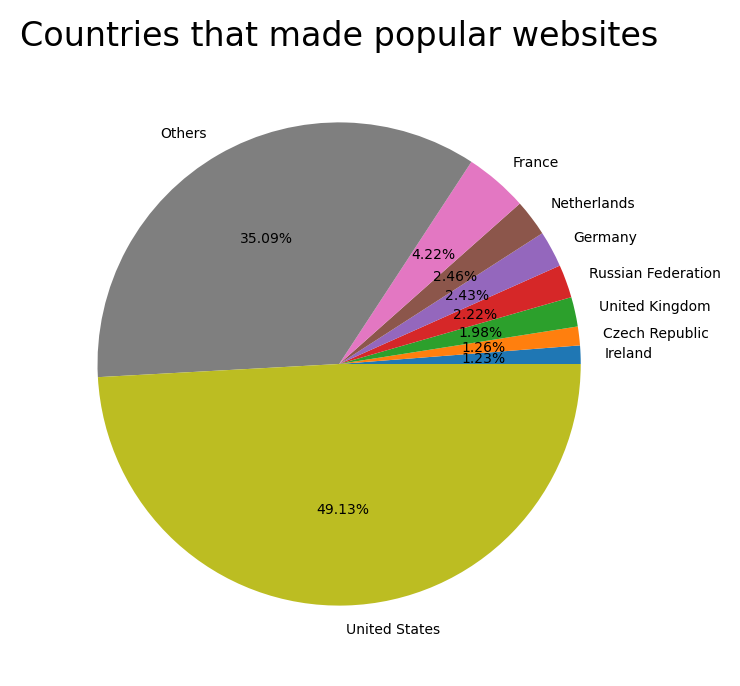

In [14]:
mydict = dict(zip(l_index['index'][:8],l_index['Location'][:8]))
mydict['Others'] = new_over33n.loc[8,'Location']
display(mydict)
sorted_dict = sorted(mydict.values())
print(sorted_dict)
sorted_labels = []

for val in sorted_dict:
    for item in mydict.items():
        if(val == item[1]):
            sorted_labels.append(item[0])
display(sorted_labels)
plt.pie(sorted_dict,  autopct='%1.2f%%',labels = sorted_labels,textprops={'fontsize': 5})
plt.title('Countries that made popular websites')
# plt.legend()
plt.show()

## Interprtation:

我們可以發現，由United States出產的熱門網站占了接近(但不到)一半的比例，雖說如此，但也遙遙領先了第二名的France。<br>
超過1%的流量網站產出國家僅有8個，而占比不超過1%的國家約有35%。

## Q:由哪家公司製作的流量網站是最多的?(合併所有不到1%的項目，視為其他。)

In [15]:
h=datao[u'Hosted_by'].value_counts().to_frame()
h_index = h.reset_index()
print(h)
ans=h['Hosted_by'].sum()
print('所有流量網站的數量為',ans)

                           Hosted_by
CloudFlare, Inc.                 593
Google Inc.                      236
Akamai Technologies, Inc.        158
Amazon Technologies Inc.          74
OVH SAS                           64
...                              ...
FTTH customer1                     1
RCS & RDS Business                 1
PRIMETEL                           1
Proxad / Free SAS                  1
Petyst Isabelle                    1

[1237 rows x 1 columns]
所有流量網站的數量為 3298


In [16]:
print('3298/10=',3298/100,"，故所有小於",round(3298/100),"的項目將合併為其他。")

3298/10= 32.98 ，故所有小於 33 的項目將合併為其他。


In [17]:
under33c=datao[u'Hosted_by'].value_counts() < 33
print(h[under33c])

num_of_other_c=h[under33c].Hosted_by.sum()
print(num_of_other_c)

                                      Hosted_by
NTT America, Inc.                            30
GoDaddy.com, LLC                             29
Fastly                                       26
Amazon Data Services Ireland Limited         20
Digital Ocean, Inc.                          18
...                                         ...
FTTH customer1                                1
RCS & RDS Business                            1
PRIMETEL                                      1
Proxad / Free SAS                             1
Petyst Isabelle                               1

[1228 rows x 1 columns]
2005


In [18]:
over33c=datao[u'Hosted_by'].value_counts() >= 33
#print(over33c)
index = h_index[:9]
index.loc[len(index.index)] = ['Others', num_of_other_c]
print(index)

new_over33c = h[over33c].append({"Hosted_by":num_of_other_c}, ignore_index=True)
print(new_over33c)

                       index  Hosted_by
0           CloudFlare, Inc.        593
1                Google Inc.        236
2  Akamai Technologies, Inc.        158
3   Amazon Technologies Inc.         74
4                    OVH SAS         64
5           Amazon.com, Inc.         56
6        Hetzner Online GmbH         40
7              Incapsula Inc         38
8              Unified Layer         34
9                     Others       2005
   Hosted_by
0        593
1        236
2        158
3         74
4         64
5         56
6         40
7         38
8         34
9       2005


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


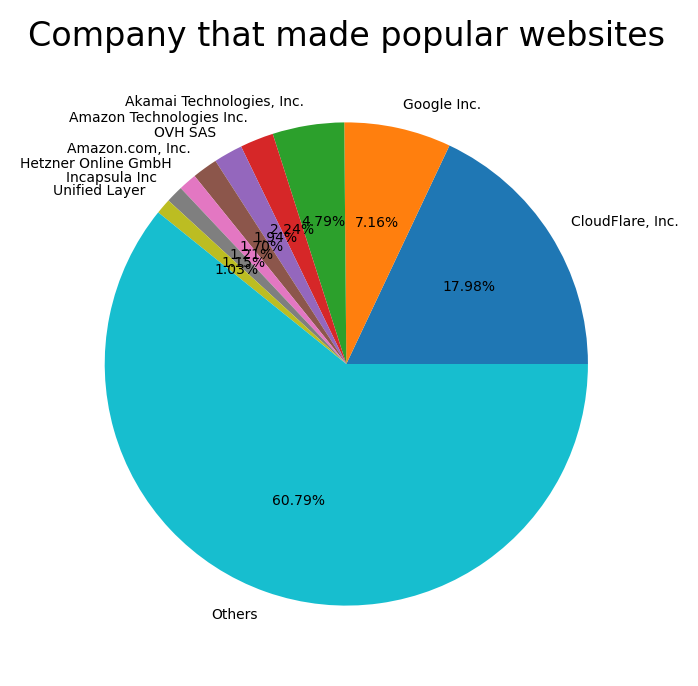

In [19]:
plt.pie(new_over33c['Hosted_by'], labels= index['index'], autopct='%1.2f%%',textprops={'fontsize': 5},)
plt.title('Company that made popular websites')

plt.show()

## Interpretation:

有六成的網站製作公司都佔不到1%的市場，而前三名公司有CloudFlare, Inc，Google Inc、及Akamai Technologies, Inc。<br>
其中第一名CloudFlare Inc就佔了快18%，可見資本是獨大的。

## Q:那麼這些超過1%的流量網出產國家，都擁有哪些公司呢?

In [20]:
L=datao['Location']
H=datao["Hosted_by"]

result={'Country':L, 'Host':H }
new_r = pd.DataFrame(result).value_counts().to_frame('counts')
Co=new_r.values.tolist()
# display(Co)
# print(Co)
# 將Co 從list of list 改成 list of int
Co_num = []
for i in range(len(Co)):
    Co_num.append(Co[i][0])
# print(Co_num)
Co.clear()
Co = Co_num
# ----------------------------------
Lo=datao['Location'].values.tolist()
Ho=datao["Hosted_by"].values.tolist()

merge=list(zip(Lo,Ho,Co))
# display(merge)
df = pd.DataFrame(merge,
    columns=['L', 'H', 'C'])
display(df)

# 刪掉count小於5的
df1 = df
df1.loc[df['C']<=5,'H'] = 'Others'
df1 = df1.groupby(['L', 'H']).sum()
df1.sort_values(by=['L'], inplace=True, ascending=False)
df1.reset_index(inplace = True)
display(df1)

# 刪掉不是八大國家的
big_country = ['United States','Ireland','France','Netherlands','Germany','Russian Federation','Czech Republic','United Kingdom']
df1 = df1[df1['L'].isin(big_country)]
display(df1)

,L,H,C
0,United States,Google Inc.,593
1,United States,Google Inc.,236
2,United States,Google Inc.,153
3,Ireland,Facebook,61
4,United States,Yahoo! Inc.,58
...,...,...,...
1269,United States,CDNetworks Inc.,1
1270,Georgia,LTD CGC Co,1
1271,Czech Republic,Livesport,1
1272,Georgia,Crystalbet Ltd,1


,L,H,C
0,United States,Zapways,9
1,United States,Microsoft Corporation,48
2,United States,"ARYAN ICT Solutions, LLC",51
3,United States,"Akamai Technologies, Inc.",52
4,United States,Amazon Technologies Inc.,14
...,...,...,...
104,Armenia,Others,4
105,Argentina,Others,21
106,Andorra,Others,3
107,Algeria,Others,7


,L,H,C
0,United States,Zapways,9
1,United States,Microsoft Corporation,48
2,United States,"ARYAN ICT Solutions, LLC",51
3,United States,"Akamai Technologies, Inc.",52
4,United States,Amazon Technologies Inc.,14
5,United States,"Automattic, Inc",7
6,United States,"CloudFlare, Inc.",39
7,United States,"Facebook, Inc.",9
8,United States,Fastly,38
9,United States,Google Inc.,990


34


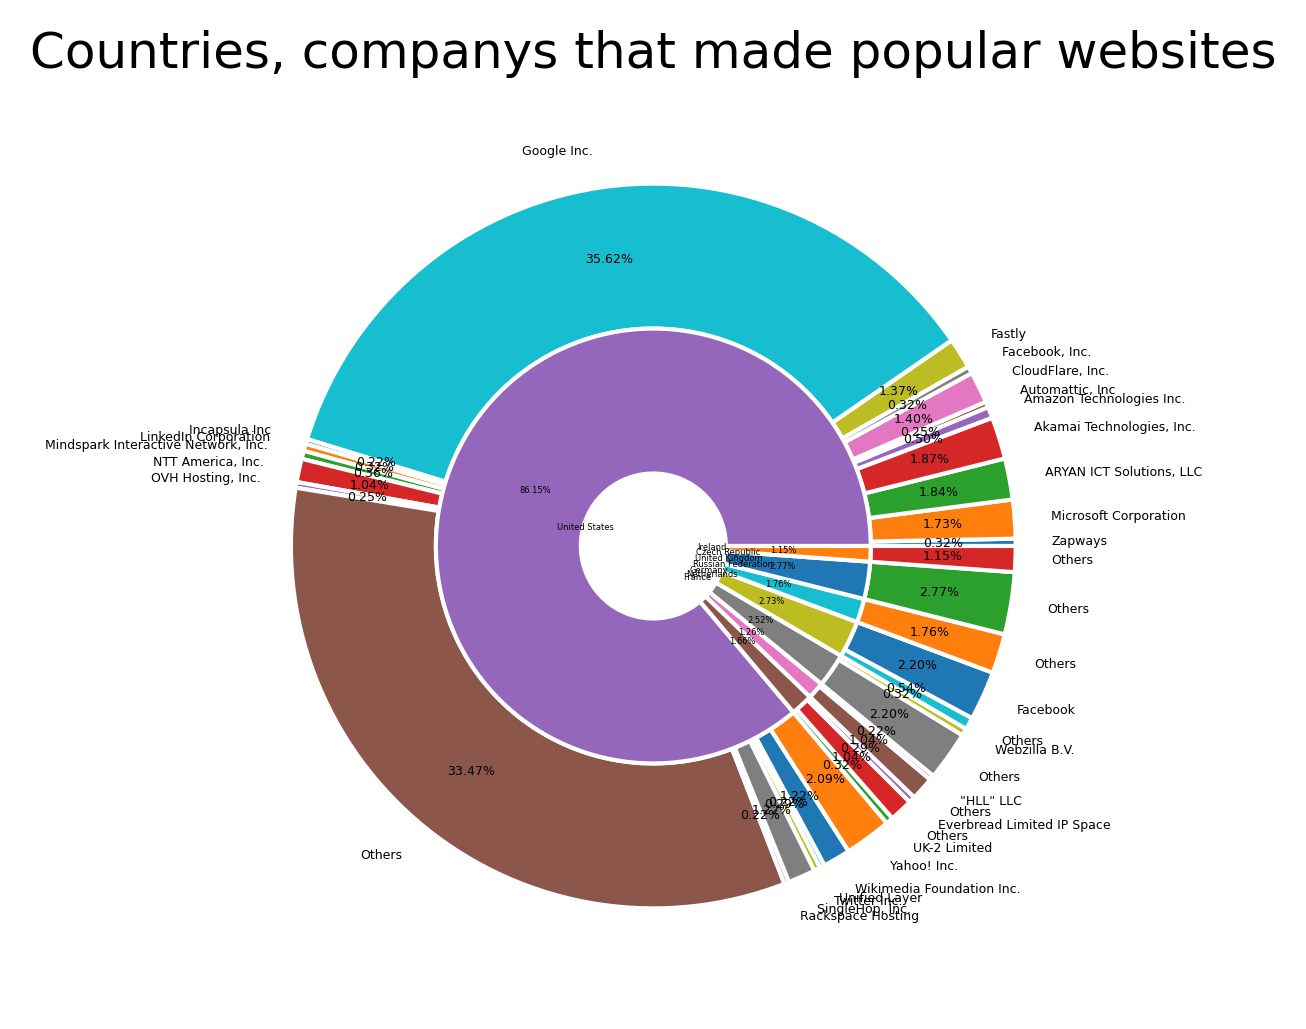

In [24]:
plt.rcParams["figure.dpi"] = 300

us_sum = df1[df1['L']=='United States']['C'].sum()
fr_sum = df1[df1['L']=='France']['C'].sum()
ne_sum = df1[df1['L']=='Netherlands']['C'].sum()
ge_sum = df1[df1['L']=='Germany']['C'].sum()
ru_sum = df1[df1['L']=='Russian Federation']['C'].sum()
uk_sum = df1[df1['L']=='United Kingdom']['C'].sum()
cr_sum = df1[df1['L']=='Czech Republic']['C'].sum()
ir_sum = df1[df1['L']=='Ireland']['C'].sum()

fig, ax = plt.subplots()
# distance = 0.6
# explode = (0, 0, 0, 0, 0, 0, 0, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance, distance,)
# inside = 0.2
# seperate = (0,inside, inside,inside, inside,inside, inside,inside,)
size = 0.4


colors_out = ['#003060','#003D79','#004B97','#005AB5','#0066CC','#0072E3','#0080FF','#2894FF','#46A3FF','#66B3FF','#84C1FF','#66B3FF','#46A3FF','#2894FF','#0080FF','#0072E3','#0066CC','#005AB5','#004B97','#0066CC','#005AB5','#004B97','#612457','#6a1b52','#793465','#bf2b60','#F50000','#FF5959','#bc421a','#E09200','#e7b040','#F0F000','#47bb3e','#426c33']
colors_ins = ['#2a52be','purple','#c10066','red','orange','yellow','#99DD00','green']

print(len(df1['C']))
ax.pie(df1['C'], labels=df1['H'],
       autopct='%1.2f%%', pctdistance=0.8,  textprops={'fontsize': 3}, colors = colors_out,
       radius=1, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([us_sum,  uk_sum,ru_sum,ne_sum,ir_sum, ge_sum, fr_sum,cr_sum], labels=['United States', 'France','Netherlands','Germany','Russian Federation', 'United Kingdom','Czech Republic','Ireland' ], labeldistance=0.2,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize': 2}, colors= colors_ins,
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))

plt.title('Countries, companys that made popular websites')
plt.show()

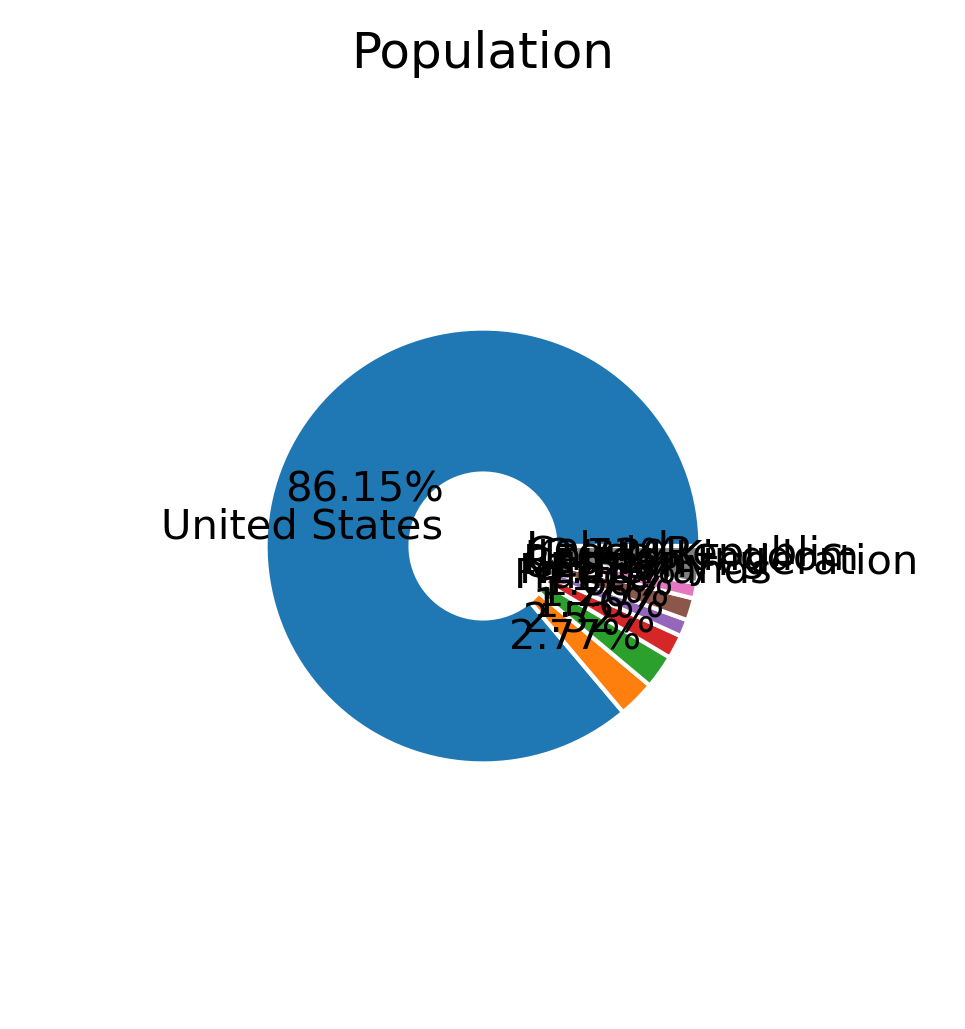

In [22]:
fig, ax = plt.subplots()
ax.pie([us_sum, fr_sum,ne_sum,ge_sum, ru_sum, uk_sum, cr_sum, ir_sum], labels=['United States', 'France','Netherlands','Germany','Russian Federation', 'United Kingdom','Czech Republic','Ireland' ], labeldistance=0.2,
       autopct='%1.2f%%', pctdistance=0.6,
       radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Population')
plt.show()

## Interpretation:

這張圖幫助我們釐清公司與註冊國家的關係。

可以看到美國(尤其是google公司，與其他小而多的各類網站們)掌握著世界網路使用者的流量。<br>
最大的公司依序是美國的google，註冊在Ireland的facebook，以及美國的yahoo、wiki。<br>
主要的流量網站都是搜尋引擎類型。<br>

## 概念釐清用

In [33]:
l= datao[u'Location'].value_counts().to_frame() 
print(l)

c=datao[u'country'].value_counts().to_frame()
print(c)

t=datao[u'Traffic_Rank'].value_counts().to_frame()
print(t)

h=datao[u'Hosted_by'].value_counts().to_frame()
print(h)

                    Location
United States           1641
France                   141
Netherlands               82
Germany                   81
Russian Federation        74
...                      ...
Djibouti                   1
Jersey                     1
Senegal                    1
Mauritania                 1
Guinea                     1

[156 rows x 1 columns]
                                  country
Afghanistan                            50
China                                  45
Albania                                43
Macedonia                              42
Iran                                   39
...                                   ...
Saint Vincent and The Grenadines        5
Togo                                    5
Sudan                                   5
Guadeloupe                              4
Gabon                                   4

[191 rows x 1 columns]
        Traffic_Rank
252                4
1 116              4
1 043              4
324             

In [22]:
# df = pd.DataFrame([
#     ['France', 61083916, 'Europe'], ['Germany', 82400996, 'Europe'], ['Italy', 58147733, 'Europe'],
#     ['Spain', 40448191, 'Europe'], ['United Kingdom', 60776238, 'Europe'], ['Taiwan', 23174294, 'Asia'],
#     ['Japan', 127467972, 'Asia'], ['Korean', 49044790, 'Asia'], ['China', 1318683096, 'Asia']],
#     columns=['country', 'pop', 'continent'])


# europe_sum = df[df['continent']=='Europe']['pop'].sum()
# asia_sum = df[df['continent']=='Asia']['pop'].sum()
# fig, ax = plt.subplots()
# size = 0.4
# ax.pie(df['pop'], labels=df['country'],
#        autopct='%1.2f%%', pctdistance=0.8,
#        radius=1, wedgeprops=dict(width=size, edgecolor='w'))
# ax.pie([europe_sum, asia_sum], labels=['Europe', 'Asia'], labeldistance=0.2,
#        autopct='%1.2f%%', pctdistance=0.6,
#        radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
# plt.title('Population')
# plt.show()